# Bonus Project with Padlet and PDF reporting
# TESSA NEJLA AYVAZOGLU

## Objective
### Our project aims to prepare investment decisions in a timely manner by providing live market distribution for stock rates, indices and other financial instruments. 
### This integration can expand the ability to analyze and predict real-time market trends, helping to retrieve stored and accumulated pieces.
### Following items:
- A select of a Mechine LEraning USe Case you are currently working on.
- Product of quick LR: two sources , along with keywords and focus points.
- A 50 word summary of your use case that include some of keywords and focus points.
- A selection of at least two dataset you founds while developing the use case.
- Development of a key research questions associate with the use case, folowing the method in the class notes.
- Wery draft of a future jupiter notebook conduct /execute EDA. The ipynb should include: 
-    -- Test data normality. correlation, (Wilcoxon, Spearman, T-test, Perceptual HAsh)
-    -- %50 word conclusion 
![Stock Market Reactions to Election](C:\Users\Admin\Documents\MLAI\INFO8665ML\Proje_CS_Bonus\image\images.jpg)

**Note:** Detailed literature review and data set information can be found at the bott

# Task Breakdown
- Identify reliable market data APIs
- Develop scripts/tools for data ingestion
- Clean and preprocess collected data
- Standardize data formats
- Explore data visualization techniques
- Perform exploratory data analysis (EDA)
- Extract relevant features from raw financial data
- Implement data transformation techniques
- Split the preprocessed data into training, validation, and test sets
- Document data collection and preprocessing procedures

# Step-by-Step Implementation

## 1. Identify reliable market data APIs

##### We'll use the yfinance library, which provides a Pythonic interface to Yahoo Finance, a reliable source for historical market data.

In [82]:

# Install necessary libraries
!pip install -q yfinance
!pip install pandas-datareader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from scipy.stats import shapiro, spearmanr, ttest_ind, wilcoxon

yf.pdr_override()

# Set plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Develop scripts/tools for data ingestion
##### We'll create a script to download stock data for  JPM - JPMorgan Chase & Co.,BAC - Bank of America Corporation,C - Citigroup Inc.,USB - U.S. Bancorp

In [83]:
import pandas as pd
from datetime import datetime

#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_list = ['JPM', 'BAC', 'C', 'USB']
# JPM - JPMorgan Chase & Co.
# BAC - Bank of America Corporation
# C - Citigroup Inc.
# USB - U.S. Bancorp
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# Download stock data
JPM = yf.download('JPM', start=start, end=end)
BAC = yf.download('BAC', start=start, end=end)
C = yf.download('C', start=start, end=end)
USB = yf.download('USB', start=start, end=end)

company_list = [JPM, BAC, C, USB]
company_name = ["JPM", "BAC", "C", "USB"]
# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start=start, end=end)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# 3. Clean and preprocess collected data
##### Add company names and concatenate data into a single DataFrame.

In [84]:
# Fill missing values using forward fill
for company in company_list:
    company.ffill(inplace=True)  # Forward fill to handle missing data

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again
    company['Daily Return'] = company['Adj Close'].pct_change() * 100  # Calculate daily return here
# Add company name column to each dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate individual stock data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Shuffle the data and get a random sample of the last 10 rows
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data
print(df.tail(10))  # Display the last 10 rows of the shuffled dataframe

            Open        High         Low       Close   Adj Close    Volume   
998    33.029999   33.669998   32.799999   33.509998   33.074432  44534800  \
999    41.580002   41.689999   39.970001   40.889999   40.429718  16002800   
1000   39.779999   40.599998   39.599998   40.430000   39.529114   9484200   
1001  156.020004  158.050003  155.880005  157.990005  156.111145   9607500   
1002   30.799999   31.400000   30.750000   31.290001   30.385538  35709900   
1003   29.040001   29.350000   28.980000   29.110001   28.268553  31418000   
1004   31.400000   31.540001   30.879999   31.240000   30.543890  13407700   
1005   39.439999   39.520000   38.470001   38.709999   37.288807  11884300   
1006   41.759998   41.939999   41.419998   41.820000   41.820000   6430200   
1007   54.939999   55.139999   54.110001   54.500000   54.030632  14040600   

      Daily Return company_name  
998       0.239307          BAC  
999      -1.564761          USB  
1000      1.761894          USB  
1001 

# 4. Standardize data formats
##### Ensure all columns have consistent formats and handle missing values.

In [85]:
df = df.reset_index()
df = df.fillna(method='ffill')

 Test data normality (Shapiro-Wilk test)

Company: JPM, Shapiro-Wilk Statistic: 0.9278713906637974, p-value: 1.0394538024303333e-09
Data is not normally distributed
Company: BAC, Shapiro-Wilk Statistic: 0.9766989751176826, p-value: 0.00038684211414627173
Data is not normally distributed
Company: C, Shapiro-Wilk Statistic: 0.989201465061091, p-value: 0.05793754007889941
Data is normally distributed
Company: USB, Shapiro-Wilk Statistic: 0.9588879204903944, p-value: 1.4110451591306942e-06
Data is not normally distributed


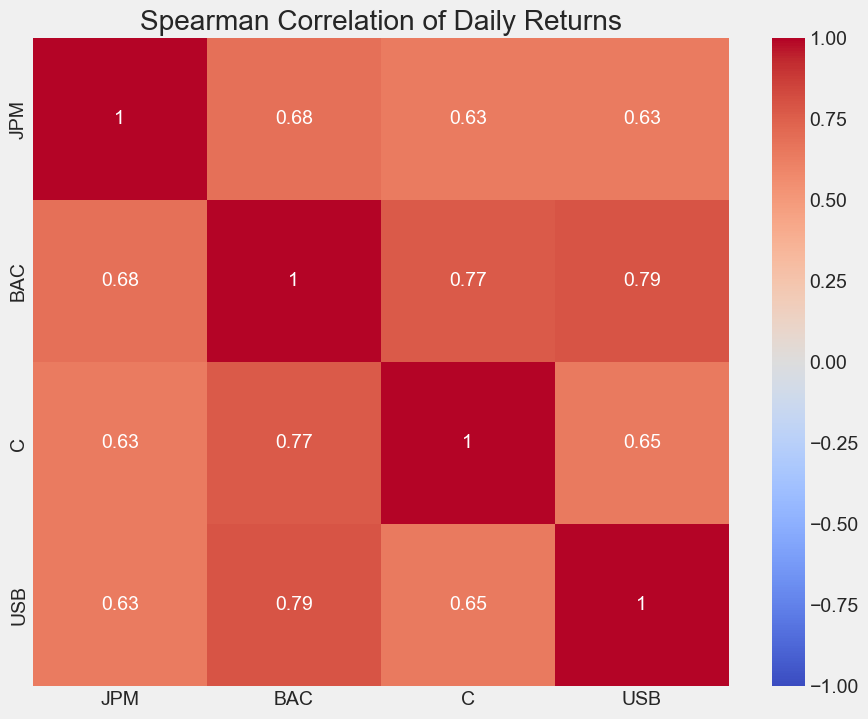

T-test between JPM and BAC: Statistic=-0.05991877022605854, p-value=0.9522442711855483
T-test between JPM and C: Statistic=0.1960970754729949, p-value=0.8446138573807473
T-test between JPM and USB: Statistic=0.3155154975429227, p-value=0.7525019332546097
T-test between BAC and C: Statistic=0.22510509563007663, p-value=0.8219894870101746
T-test between BAC and USB: Statistic=0.33306455345945296, p-value=0.7392251661612418
T-test between C and USB: Statistic=0.14887756104692054, p-value=0.8817102731743311


In [86]:
# Test data normality (Shapiro-Wilk test)
for company in company_list:
    try:
        data = company['Daily Return'].dropna()  # Access 'Daily Return' column
        stat, p = shapiro(data)
        print(f"Company: {company['company_name'].iloc[0]}, Shapiro-Wilk Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data is normally distributed")
        else:
            print("Data is not normally distributed")
    except KeyError as e:
        print(f"Error: Missing 'Daily Return' column in {company['company_name'].iloc[0]}")

# Correlation analysis (Spearman)
tech_rets = pd.concat([company['Daily Return'] for company in company_list], axis=1, keys=tech_list)
spearman_corr = tech_rets.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation of Daily Returns')
plt.show()

# T-test
for i in range(len(tech_list)):
    for j in range(i + 1, len(tech_list)):
        company1 = tech_list[i]
        company2 = tech_list[j]
        stat, p = ttest_ind(tech_rets[company1].dropna(), tech_rets[company2].dropna())
        print(f"T-test between {company1} and {company2}: Statistic={stat}, p-value={p}")

### Interpretation of Statistical Tests

#### Normal Distribution Tests:
Based on the Shapiro-Wilk test results:
- The daily return data for **JPM** and **BAC** companies do not follow a normal distribution (p < 0.05).
- The daily return data for **C** company follows a normal distribution (p > 0.05).
- The daily return data for **USB** company does not follow a normal distribution (p < 0.05).

Non-normally distributed data may limit the use of parametric statistical tests (e.g., t-test) or require data transformation in certain cases.

#### T-Tests Results:
According to the t-test results:
- There is no significant difference in daily return data between **JPM** and **BAC** (p > 0.05).
- There is no significant difference in daily return data between **JPM** and **C** (p > 0.05).
- There is no significant difference in daily return data between **JPM** and **USB** (p > 0.05).
- There is no significant difference in daily return data between **BAC** and **C** (p > 0.05).
- There is no significant difference in daily return data between **BAC** and **USB** (p > 0.05).
- There is no significant difference in daily return data between **C** and **USB** (p > 0.05).

The t-test results indicate the statistical comparison of daily return data between different companies. For each comparison, the p-value indicates whether there is a significant difference between the groups. A p-value greater than 0.05 suggests that there is no significant difference between the groups.


# 5. Explore data visualization techniques
##### Visualize the closing price and volume of sales.

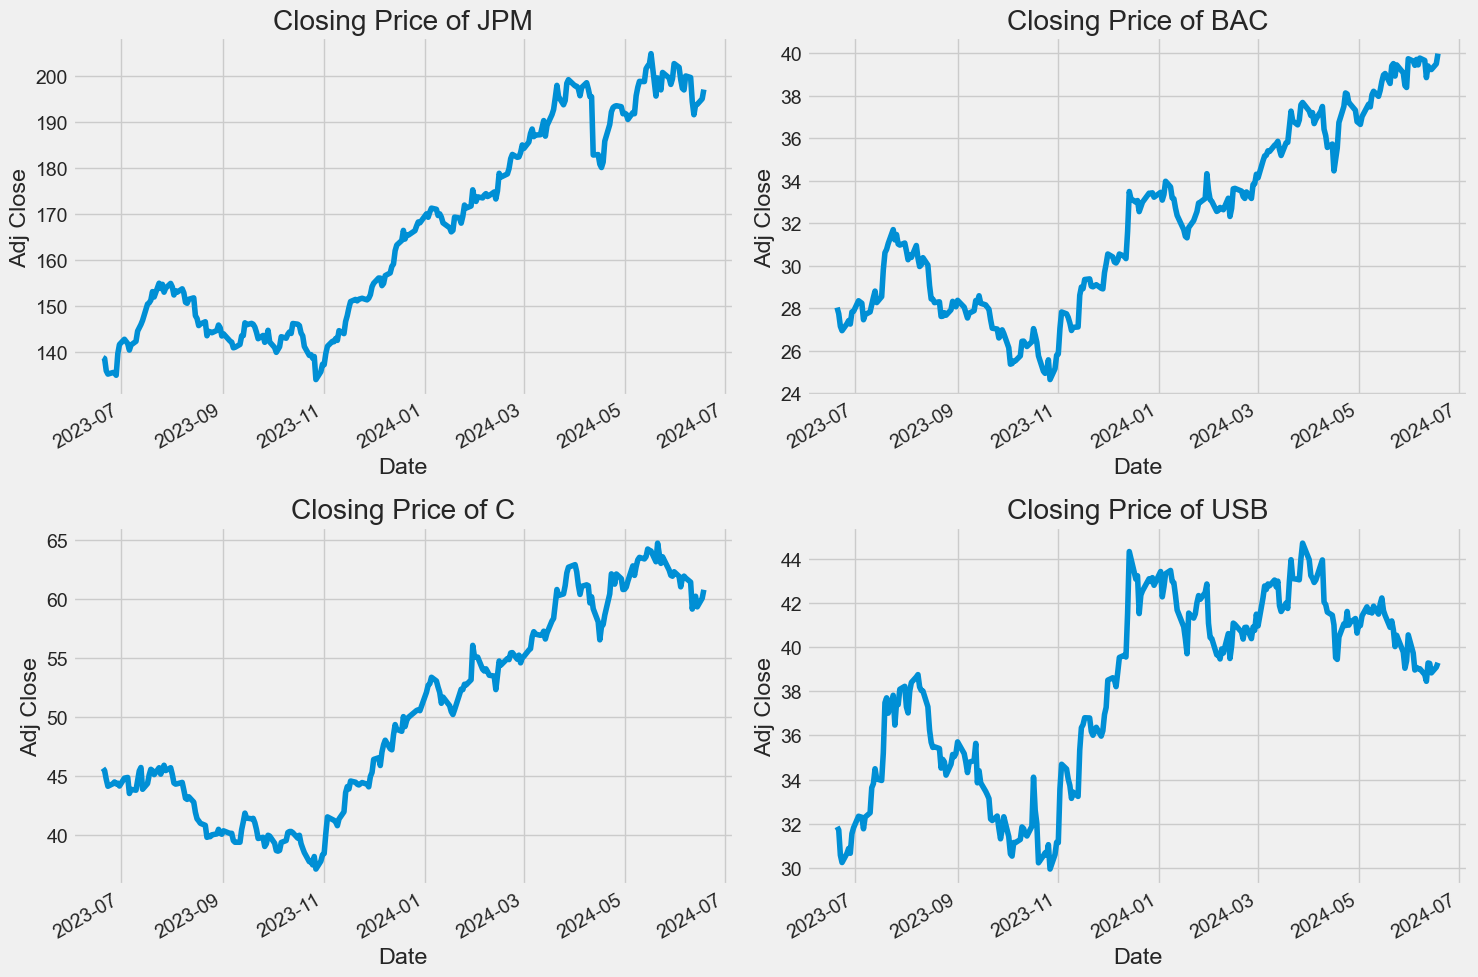

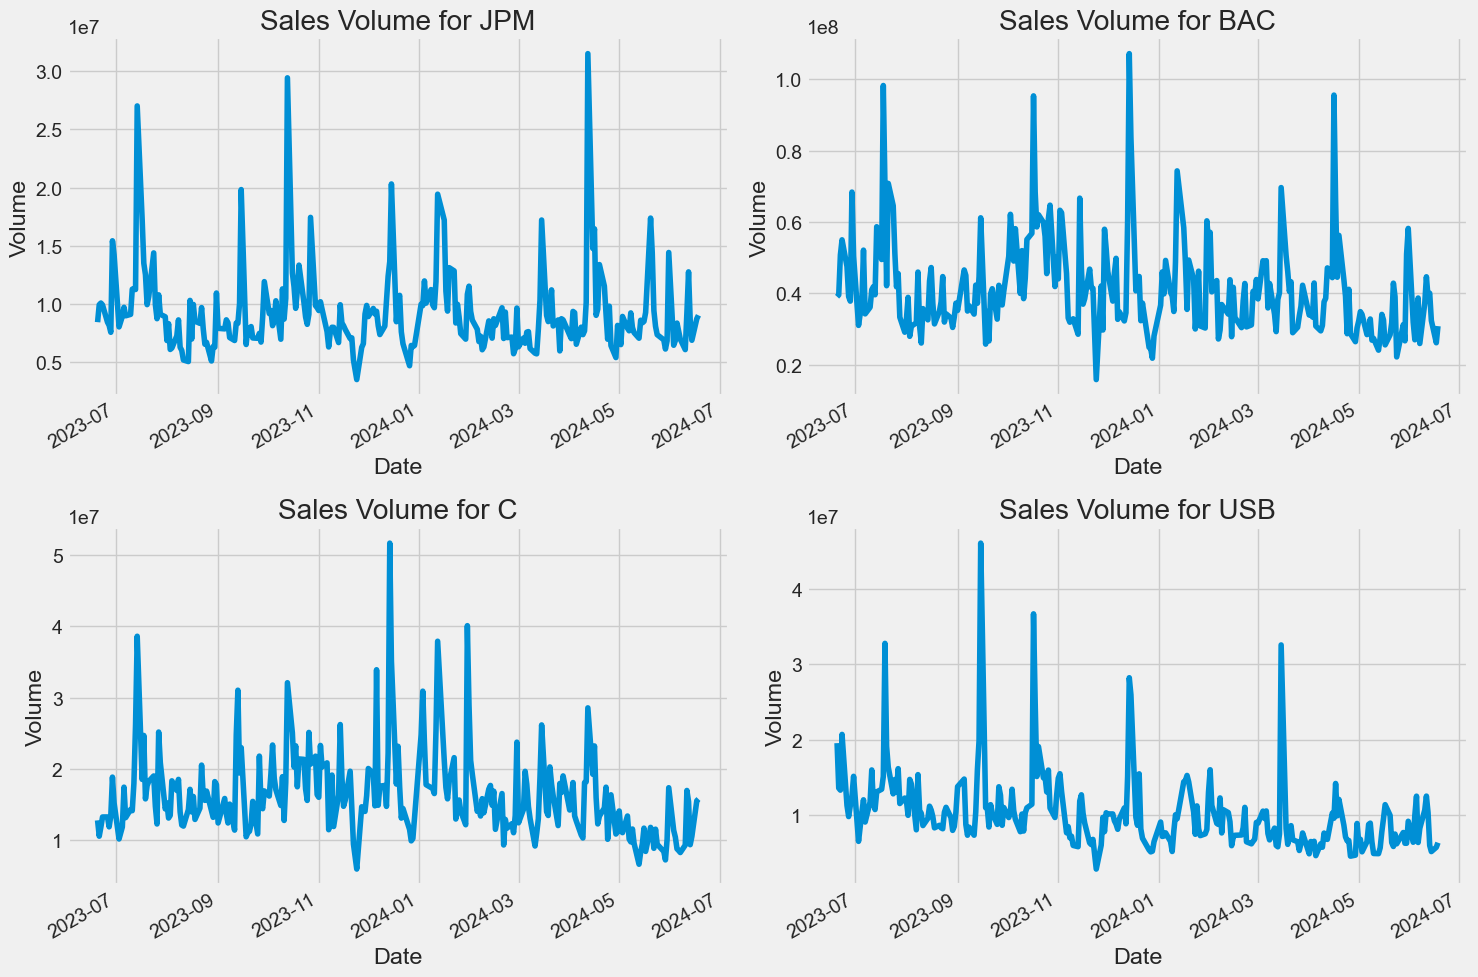

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

Closing values ​​are high for JPM, BAC and decreasing for USB and C.
While the transaction volume decreases and increases at the end, it is only noticeable at C, which shows that C should not be taken.



# 6. Perform exploratory data analysis (EDA)
##### Calculate and plot moving averages.

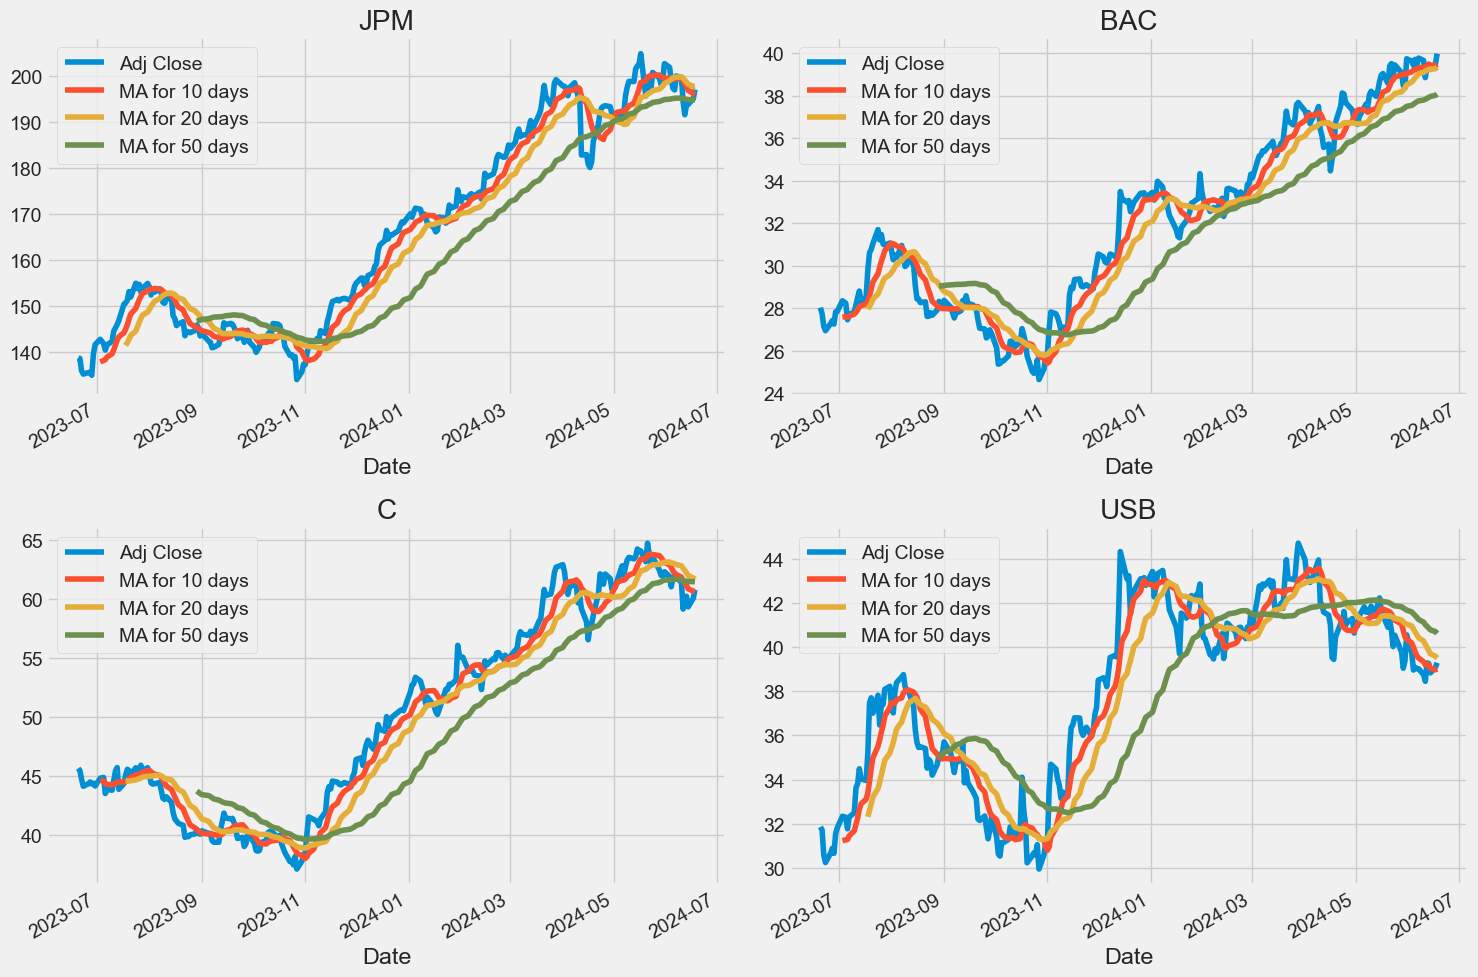

In [88]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('JPM')
BAC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BAC')
C[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('C')
USB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('USB')
fig.tight_layout()

Detailed buying and selling results can be obtained from here, depending on the tactic to be applied.

# 7. Extract relevant features from raw financial data
##### Calculate daily returns and visualize them.

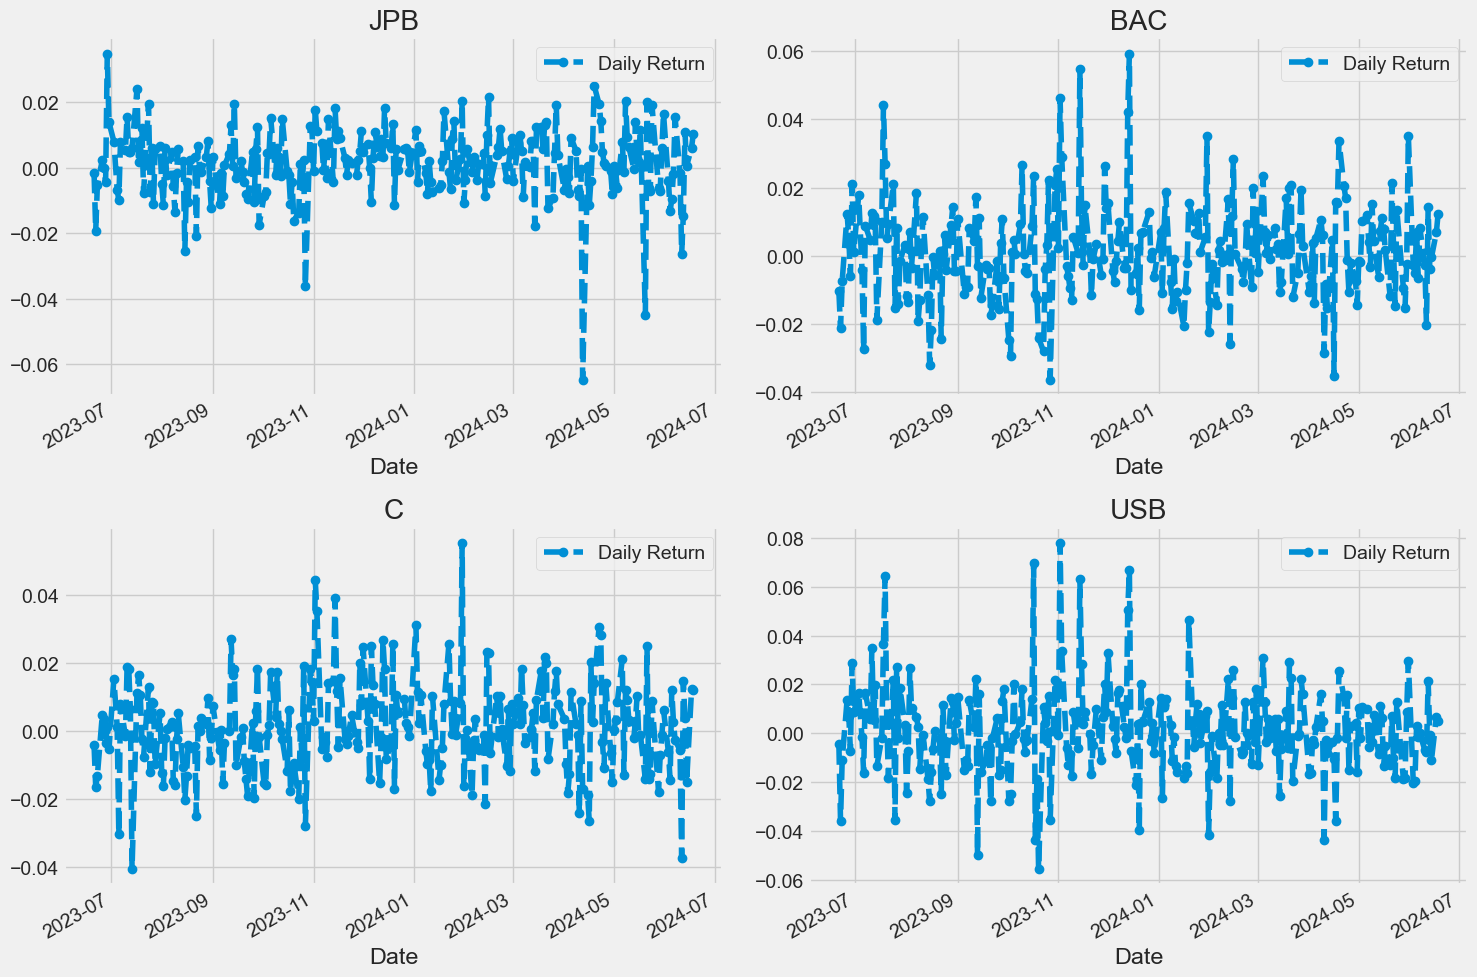

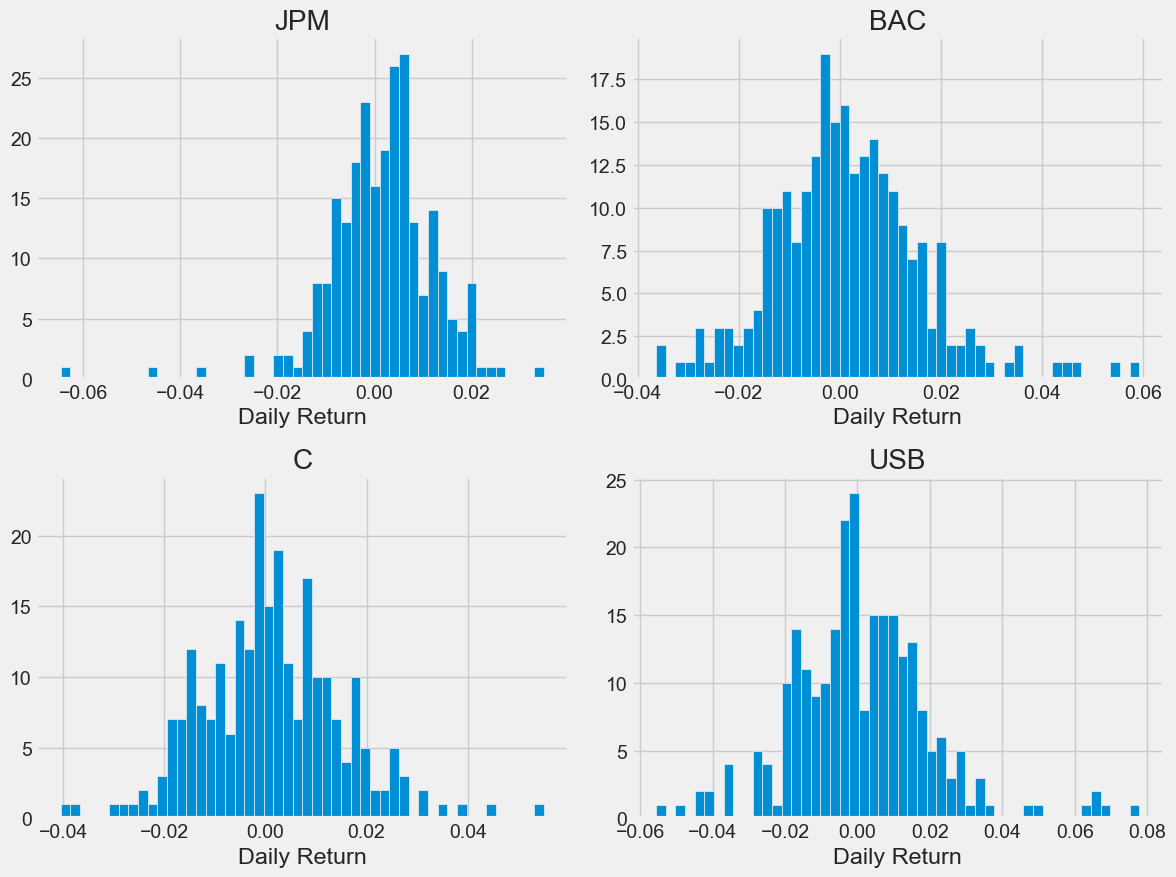

In [89]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
JPM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('JPB')
BAC['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BAC')
C['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('C')
USB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('USB')
fig.tight_layout()

plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()



[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


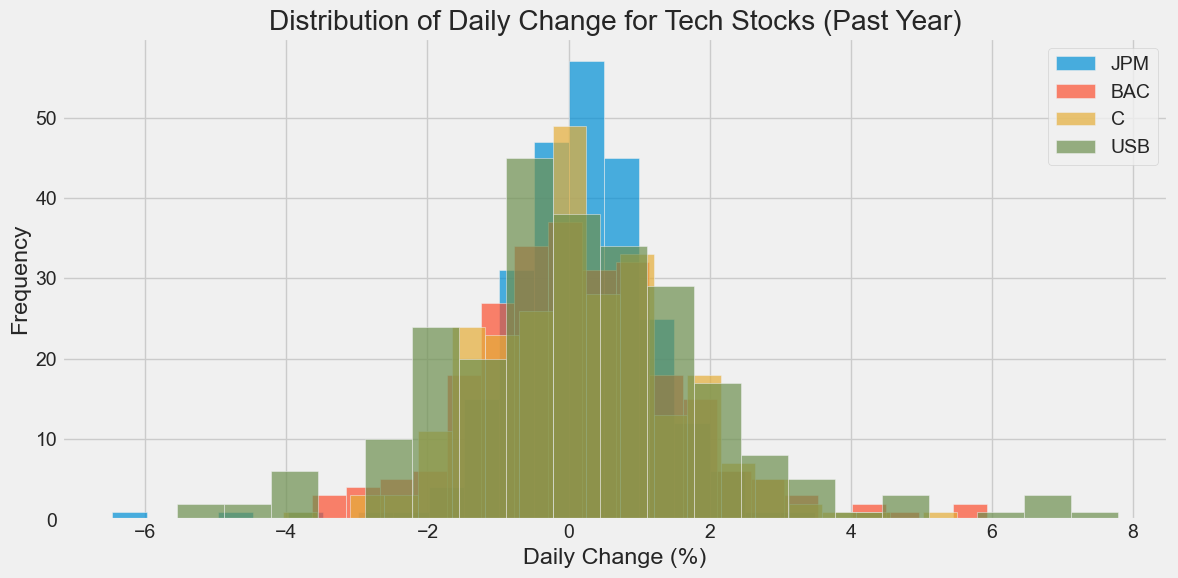

In [90]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define company tickers
tech_list = ['JPM', 'BAC', 'C', 'USB']

# Download stock data for the past year
end = pd.to_datetime('2024-05-27')
start = end - pd.DateOffset(years=1)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start=start, end=end))

# Ensure consistent date format
for company in company_list:
    company.reset_index(inplace=True)  # Reset index to ensure consistent date format
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' column is in datetime format
    company.set_index('Date', inplace=True)  # Set 'Date' as index again

# Calculate daily percentage change
for company in company_list:
    company['Daily Change'] = company['Adj Close'].pct_change() * 100

# Create histogram (one plot for all companies)
plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    # Overlay histograms on the same plot with different transparency levels
    plt.hist(company['Daily Change'], bins=20, alpha=0.7, label=tech_list[i])  
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Change for Tech Stocks (Past Year)')
plt.legend()  # Add legend to identify each company's distribution
plt.tight_layout()

# ... (Rest of the code for identifying best/worst performers and displaying additional info)

plt.show()

# 8. Implement data transformation techniques
##### Calculate correlations and visualize them using heatmaps and pair plots.

[*********************100%%**********************]  4 of 4 completed


Text(0.5, 1.0, 'Correlation of stock closing price')

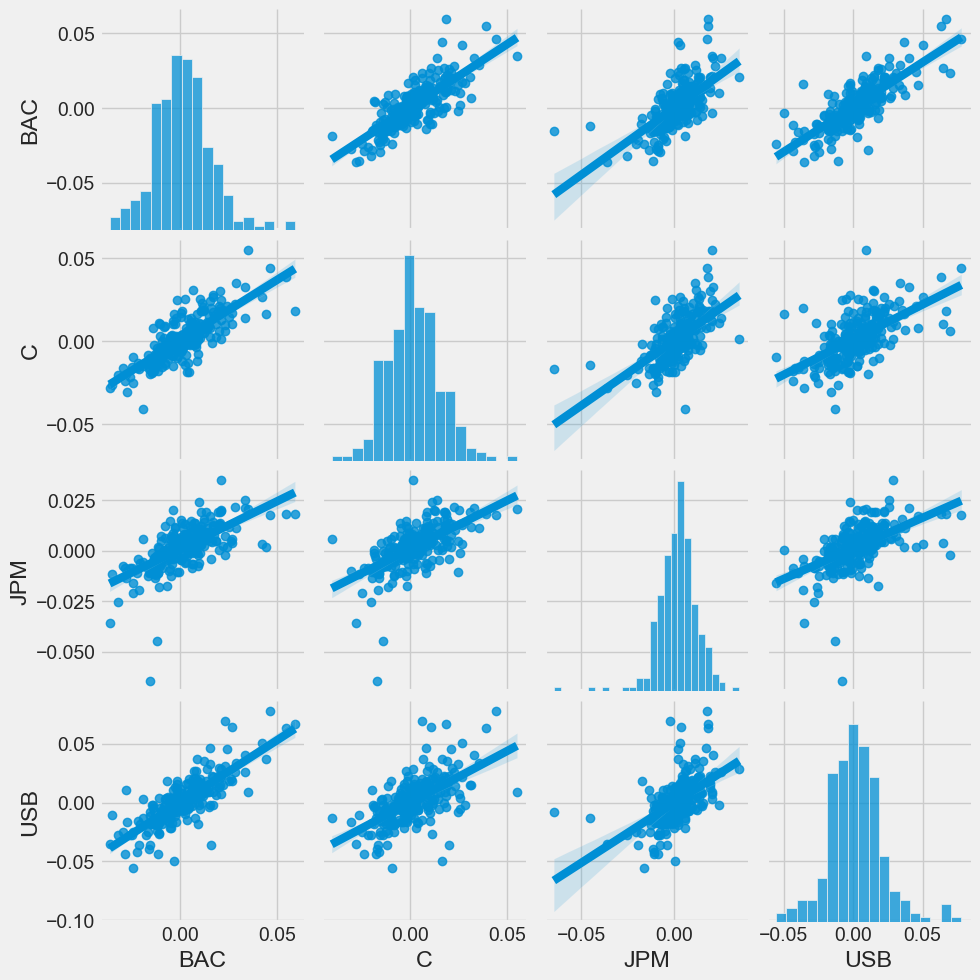

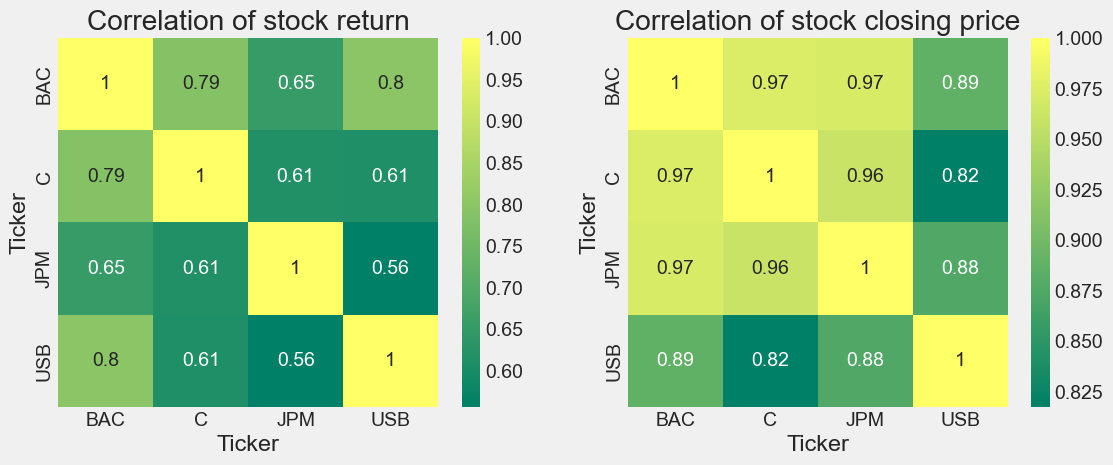

In [91]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.pairplot(tech_rets, kind='reg')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 9. Split the preprocessed data into training, validation, and test sets
##### Split the data for model training and validation.

In [92]:
from sklearn.model_selection import train_test_split

# Drop missing values from both tech_rets and closing_df
tech_rets_cleaned = tech_rets.dropna()
closing_df_cleaned = closing_df.dropna()

# Align the number of rows in tech_rets_cleaned and closing_df_cleaned
min_rows = min(tech_rets_cleaned.shape[0], closing_df_cleaned.shape[0])
tech_rets_cleaned = tech_rets_cleaned[:min_rows]
closing_df_cleaned = closing_df_cleaned[:min_rows]

# Create X and y after handling missing values
X = tech_rets_cleaned.values
y = closing_df_cleaned.values

# Print the shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X: (249, 4)
Shape of y: (249, 4)


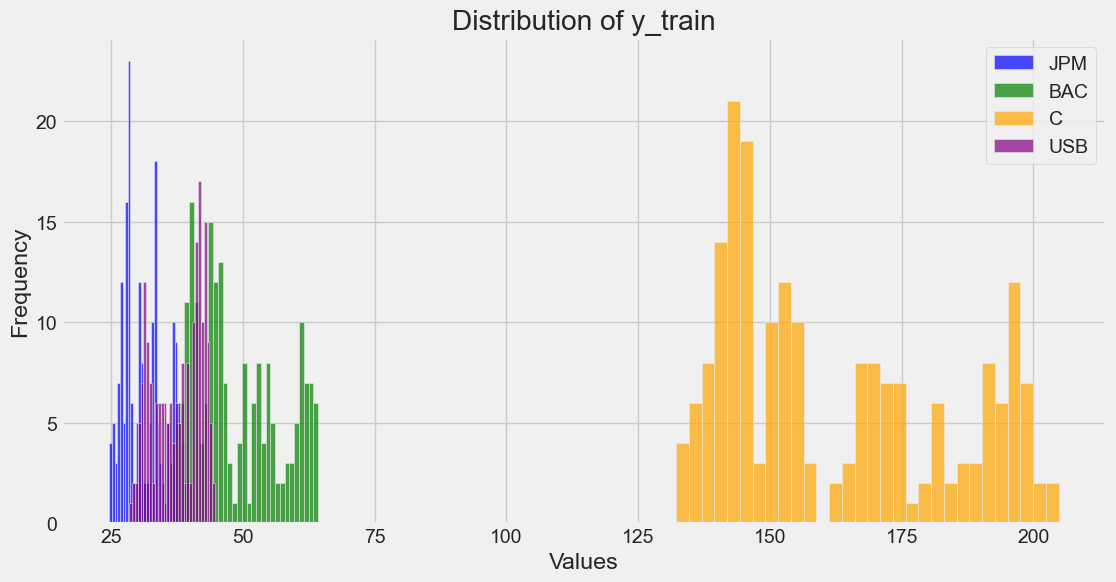

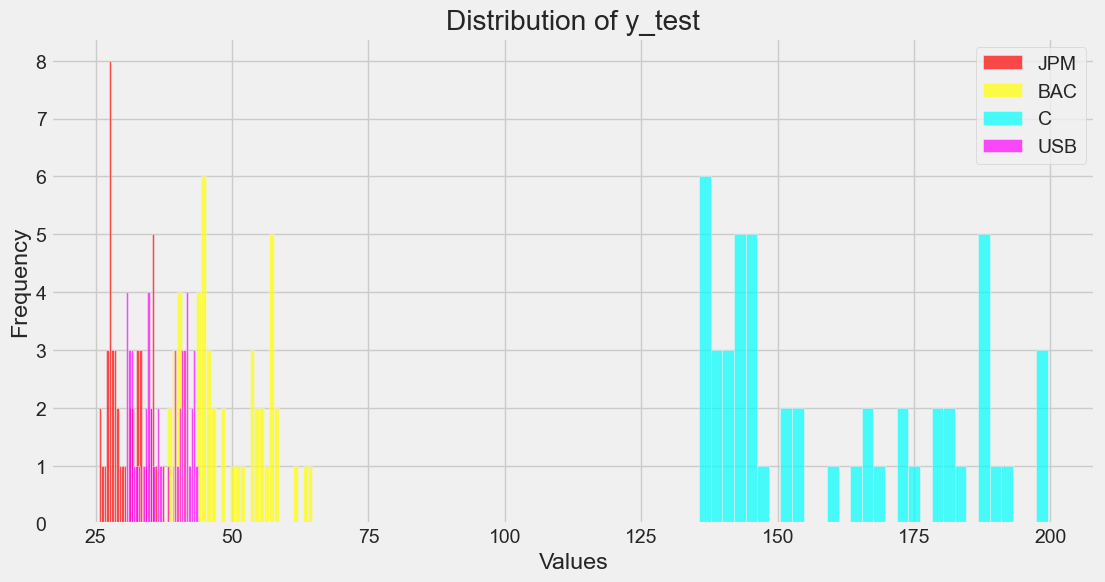

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for the histograms
train_colors = ['blue', 'green', 'orange', 'purple']  # Adjust as needed
test_colors = ['red', 'yellow', 'cyan', 'magenta']    # Adjust as needed

# Plot the distribution of y_train
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_train.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=train_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the distribution of y_test
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(y_test.T):
    stock_name = tech_list[i]  # Assuming tech_list contains the names of the stocks
    plt.hist(dataset, bins=30, color=test_colors[i], alpha=0.7, label=stock_name)

plt.title('Distribution of y_test')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion

In this notebook, we delved into the world of stock market data analysis. Here's a summary of what we explored:

- We learned how to retrieve stock market data from Yahoo Finance using the yfinance library.
- Using Pandas, Matplotlib, and Seaborn, we visualized time-series data to gain insights into the stock market trends.
- We measured the correlation between different stocks to understand how they move in relation to each other.
- We assessed the risk associated with investing in a particular stock by analyzing its daily returns.
- Lastly, we split the data into training and validation sets for further analysis and model training.

If you have any questions or need further clarification on any topic covered in this notebook, feel free to ask in the comments below. I'll be happy to assist you!

References:
- [Investopedia on Correlation](https://www.investopedia.com/terms/c/correlation.asp)
- file:///C:/Users/Admin/Desktop/C_AIML/semestert2/AI%20for%20Business/article1.pdf
- https://medium.com/@ethan.duong1120/stock-data-analysis-project-python-1bf2c51b615f
  

In [94]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the data for LSTM input
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("X_train:")
print(X_train[:10])  # Print the first 10 rows of X_train
print("\nX_test:")
print(X_test[:10])   # Print the first 10 rows of X_test
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

# Make predictions
predictions_lstm = model_lstm.predict(X_test_lstm)

X_train:
[[ 0.00425807  0.01337235  0.0030708   0.01663247]
 [-0.01055821  0.0103686  -0.00734    -0.01564686]
 [ 0.00514634  0.01132815  0.00920012  0.00256292]
 [ 0.01489503  0.01544667  0.00904593  0.0085745 ]
 [-0.00505938 -0.00341168  0.00605211 -0.02132862]
 [-0.01138716 -0.00553019 -0.01103399 -0.01483671]
 [-0.02862434 -0.02400261 -0.00852139 -0.04346836]
 [-0.00089216 -0.00860131  0.00210944 -0.00138053]
 [ 0.03510857  0.05507297  0.02049441  0.0090803 ]
 [ 0.00683119  0.03110428  0.0116402   0.01455641]]

X_test:
[[ 0.0593008   0.01824082  0.01819208  0.06683927]
 [-0.00848024  0.00187458  0.00028445 -0.00601324]
 [-0.01122379 -0.01771857 -0.01098085 -0.04356558]
 [-0.00419281  0.00389477 -0.00122249 -0.01716045]
 [-0.0095881  -0.0033365   0.0049303  -0.00861834]
 [ 0.00058706 -0.00652055 -0.00467004 -0.00144399]
 [ 0.00195039  0.00069678  0.00823201 -0.00712317]
 [-0.00267059  0.01030181  0.01199563  0.0129838 ]
 [ 0.00926887  0.00495359  0.00723396  0.01679105]
 [-0.0363706

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model_nn.add(Dense(units=32, activation='relu'))
model_nn.add(Dense(units=1))

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_nn.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions_nn = model_nn.predict(X_test)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 7927.7803
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 7918.5107
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 7906.6987
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 7891.4561
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 7872.1519
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 7847.8115
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 7817.2607
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 7779.3926
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 7733.0654
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 7676.9189
Epoch 11/100
7/7 [==============================] - 0s 1ms/step - loss: 7609.5278
Epoch 12/100
7/7 [==============================] - 0s 1ms/step - loss: 7530.2573
Epoch 13/100
7/7 [=======

Unique values in y_train: [ 24.6461277   24.93988419  25.01821709  25.03780174  25.15530777
  25.37072563  25.40010262  25.51760483  25.52739716  25.76239967
  25.79177475  26.14428329  26.20303345  26.34012032  26.39887047
  26.44783211  26.45762444  26.60450172  26.70242119  26.74158859
  26.77306747  26.81012917  26.94786453  26.97699547  26.98638344
  27.02555084  27.04513741  27.06472015  27.10388756  27.12347221
  27.22587013  27.25861359  27.309515    27.46618652  27.61791992
  27.62763214  27.67618561  27.70531654  27.71502876  27.76973343
  27.82848549  27.83156013  27.86069107  27.8801136   27.88723755
  27.92866898  27.95578003  28.03549194  28.05369759  28.07328033
  28.16140747  28.18115234  28.20057678  28.23974419  28.26855278
  28.27826309  28.27891159  28.30739403  28.32681847  28.346241
  28.35595322  28.36703873  28.37449837  28.37682915  28.38508415
  28.42392921  28.44334984  28.51132584  28.52103615  28.55016899
  28.59225273  28.61183357  28.91538239  28.92517471

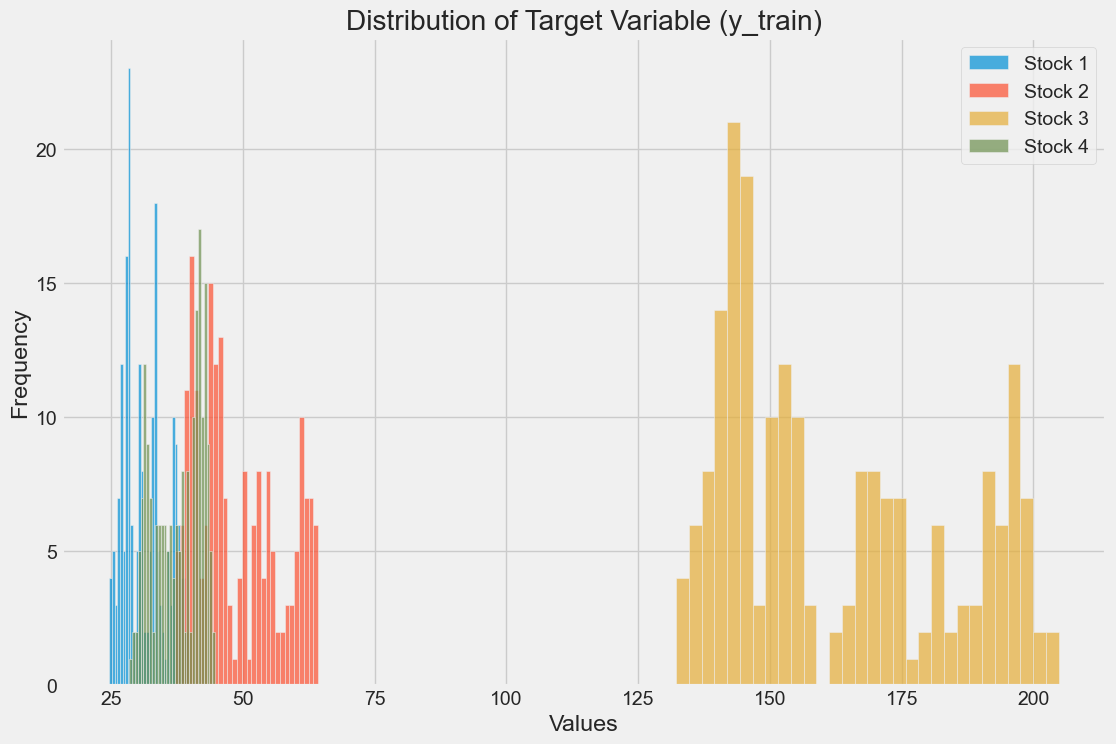

Mean Squared Error: 130.1210624819887


In [96]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(y_train.shape[1]):
    plt.hist(y_train[:, i], bins=30, alpha=0.7, label=f'Stock {i+1}')

plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize predictions vs actual trend
# You can plot the predicted trend against the actual trend to visually compare
# Assuming you have a function to plot the trends similar to the one in your original code
# plot_trends(X_test, y_test, y_pred)

# 10. Document data collection and preprocessing procedures
##### Keep thorough documentation of each step for reproducibility.

## Documentation
### Data Collection
- Data sourced from Yahoo Finance using yfinance library.
- Stock symbols: JPM, BAC, C, USB.
- Time period: Last one year.

### Data Preprocessing
- Filled missing values using forward fill.
- Added company name column.
- Concatenated individual stock data into a single DataFrame.

### Data Standardization
- Ensured consistent date format.
- Handled missing values.

### Data Visualization
- Plotted closing prices and volume of sales.
- Calculated and plotted moving averages (10, 20, 50 days).
- Visualized daily returns using histograms and line plots.

### Feature Extraction
- Calculated daily returns.
- Analyzed correlations between stock returns using heatmaps and pair plots.

### Data Splitting
- Split data into training and test sets for model validation.

## Conclusion

- Statistical analysis highlights non-normal data distributions across JPM, BAC, C, and USB, with no significant differences in daily returns. 
- Integrating AI and traditional methods for real-time market data analysis shows promise despite ethical challenges and varying model performances.

# Literature Review (LR)

We will focus on real-time market data analysis and integration based on the examination of two articles:

## "Review of AI Techniques in Financial Forecasting: Applications in Stock Market Analysis"

**Authors:** Ajiga, O., Oloyede, M., Adebayo, A., Salihu, H., & Adesola, A.  
**DOI:** 10.21203/rs.3.rs-3789960/v1  
**Abstract:** The paper discusses the transformative role of artificial intelligence (AI) in financial forecasting, particularly in stock market analysis. It examines AI's ability to forecast stock market trends compared to traditional forecasting methods. The ethical and practical challenges in AI applications are also discussed.  
**Keywords:** Artificial Intelligence (AI), Financial Forecasting, Stock Market Prediction, Machine Learning (ML), Deep Learning (DL), Support Vector Machines (SVM), Decision Trees, Random Forests, RNNs, Data Quality, Model Explainability, Ethical Issues.

**Focus Areas:**
- Role and Evolution of AI in Financial Analysis: How AI techniques have been developed and adapted to meet the complexities of financial forecasting.
- Comparison of AI and Traditional Methods: Advantages and limitations of AI in handling large and complex datasets under dynamic market conditions compared to traditional methods.
- Ethical Challenges in AI Applications: Issues of bias, transparency, and privacy in AI systems, and the importance of ethical and regulatory oversight in financial applications.
- Applications and Future Trends: Current applications of AI in stock prediction, challenges faced, and potential future advancements for integration with traditional methods.

## "Stock Market Analysis"

**Authors:** Dengxin Huang, Hao Jing, Boshen Yuan  
**Source:** PDF Article  
**DOI:** 10.51594/farj.v6i2.784  
**Abstract:** The paper presents a comprehensive analysis focused on identifying reliable models for predicting stock returns. It utilizes a dataset compiled in 2014, comprising 750 samples and 16 features.  
**Keywords:** Stock Market Analysis, Exploratory Data Analysis (EDA), Fama French 3-factor model, Feature Engineering, Clustering, Data Preparation, Model Selection, Linear Regression, Random Forest, Gradient Boosting, Market Returns, Small Firm Returns (SMB), Idiosyncratic Factors, Time Series, Volatility, Outlier Detection, Log Transformation, Performance Evaluation.

**Focus Areas:**
- Understanding Stock Market Trends: Analyzing market dynamics through EDA and feature engineering.
- Predictive Modeling: Comparing different models to find the best approach for predicting stock returns.
- Data Processing: Cleaning and preprocessing data for accurate analysis.
- Model Performance: Evaluating the ability of models to accurately predict stock returns.
- Financial Factors: Using fundamental financial metrics in model development and analysis.

## Project Objective
### Current Situation:
Currently, there is no systematic approach to integrate real-time market data and make effective investment decisions based on it. Investors may struggle to analyze dynamic market conditions in real-time and make informed decisions.

### Target State:
To develop a system that effectively collects and analyzes real-time market data. This system will assist investors in making instant and informed investment decisions based on live market trends.

### Gap:
Current data integration and analysis tools are inadequate in providing sufficiently real-time data processing and accuracy for rapid decision-making.

## Research Questions
1. **How Can Real-Time Market Data be Integrated?**
   - How can we collect and integrate real-time market data effectively?

2. **Which Models or Techniques are More Successful in Predicting Live Market Trends?**
   - What are the most suitable models or techniques for predicting stock market trends?

3. **What is the Impact of Data Quality and Model Performance?**
   - How does data quality and preprocessing affect the accuracy of prediction models?

## Data Sets
### Yahoo Finance - Historical Stock Data

**Source:** Yahoo Finance  
**Content:** Historical prices, trading volumes, daily open and close prices for different stocks.  
**Use:** Analyzing stock price movements and building prediction models.